In [42]:
import pandas as pd

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn import linear_model
from sklearn.cluster import KMeans

In [4]:
iris = datasets.load_iris()

# Dataset

In [10]:
diabetes = pd.read_csv('diabetes.csv')
batimentos = pd.read_csv('batimentos cardiacos.csv')
colesterol = pd.read_csv('colesterol.csv')

# Classificação

In [16]:
x = diabetes.drop('resultado', axis=1)
y = diabetes['resultado']

In [20]:
SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [23]:
clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [24]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4121988, splitter='best')

In [25]:
clf_arvore.score(x_teste, y_teste)

0.7395833333333334

In [27]:
clf_dummy = DummyClassifier(strategy='most_frequent')

In [28]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [29]:
clf_dummy.score(x_teste, y_teste)

0.6666666666666666

[Text(418.5, 475.65000000000003, 'concentracao_glicose <= 123.5\ngini = 0.457\nsamples = 576\nvalue = [372, 204]\nclass = Não Ativado'),
 Text(209.25, 339.75, 'idade <= 28.5\ngini = 0.301\nsamples = 336\nvalue = [274, 62]\nclass = Não Ativado'),
 Text(104.625, 203.85000000000002, 'imc <= 45.4\ngini = 0.155\nsamples = 189\nvalue = [173, 16]\nclass = Não Ativado'),
 Text(52.3125, 67.94999999999999, 'gini = 0.131\nsamples = 185\nvalue = [172, 13]\nclass = Não Ativado'),
 Text(156.9375, 67.94999999999999, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Ativado'),
 Text(313.875, 203.85000000000002, 'imc <= 26.35\ngini = 0.43\nsamples = 147\nvalue = [101, 46]\nclass = Não Ativado'),
 Text(261.5625, 67.94999999999999, 'gini = 0.069\nsamples = 28\nvalue = [27, 1]\nclass = Não Ativado'),
 Text(366.1875, 67.94999999999999, 'gini = 0.47\nsamples = 119\nvalue = [74, 45]\nclass = Não Ativado'),
 Text(627.75, 339.75, 'concentracao_glicose <= 154.5\ngini = 0.483\nsamples = 240\nvalue = [98, 142]\

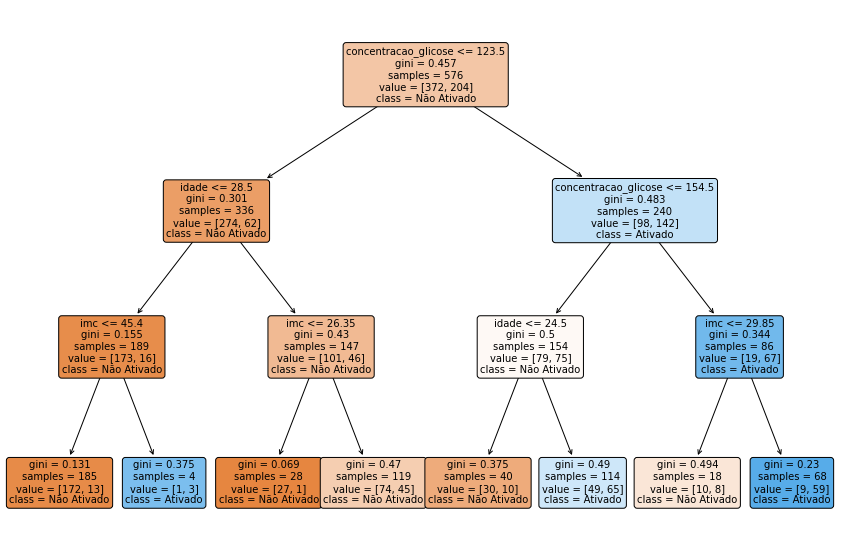

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado','Ativado'], rotate=True)

# Regressão

<Figure size 1440x720 with 0 Axes>

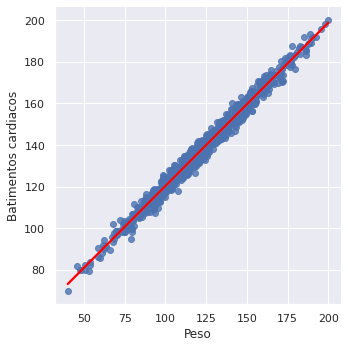

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(20, 10))
sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos,line_kws={'color':'red'})
plt.show()

In [34]:
x = batimentos[['Peso', 'Idade']]
y = batimentos['Batimentos cardiacos']

In [36]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=SEED)

In [39]:
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [40]:
rgs.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [41]:
rgs.score(x_teste, y_teste)

0.9867270016177966

# Clustering

In [48]:
colesterol

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236


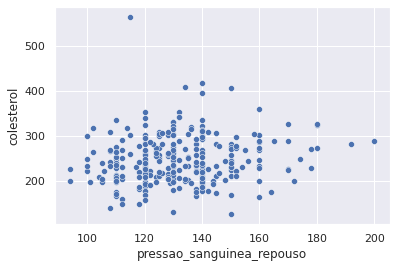

In [45]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol)

In [43]:
kmeans = KMeans(n_clusters=2, random_state=9)

In [51]:
x = colesterol.select_dtypes('int64')

In [52]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [53]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

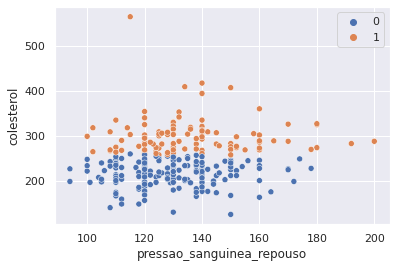

In [55]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data=colesterol, hue=kmeans.labels_)

In [56]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,1
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,0


In [57]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64